# Loan Prediction 06 - Training and Validation of Models with MissForest Imputed Dataset

In [21]:
import sys
sys.path.append('utils')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.style.use('seaborn')


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import metrics_utils 
import model_utils

In [11]:
df_import = pd.read_csv('dataset/train_rf_imputed.csv')
df_import.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Base_Loan_Installment,Remaining_Income,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,98.22,360.0,1.0,2.0,275.000556,0.948233,1
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.00,360.0,1.0,0.0,359.111111,0.941042,0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.00,360.0,1.0,2.0,185.166667,0.938278,1
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.00,360.0,1.0,2.0,336.666667,0.931863,1
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.00,360.0,1.0,2.0,395.583333,0.934069,1
5,1.0,1.0,2.0,0.0,1.0,5417.0,4196.0,267.00,360.0,1.0,2.0,749.083333,0.922076,1
6,1.0,1.0,0.0,1.0,0.0,2333.0,1516.0,95.00,360.0,1.0,2.0,266.527778,0.930754,1
7,1.0,1.0,3.0,0.0,0.0,3036.0,2504.0,158.00,360.0,0.0,1.0,443.277778,0.919986,0
8,1.0,1.0,2.0,0.0,0.0,4006.0,1526.0,168.00,360.0,1.0,2.0,471.333333,0.914799,1
9,1.0,1.0,1.0,0.0,0.0,12841.0,10968.0,349.00,360.0,1.0,1.0,979.138889,0.958875,0


In [12]:
columns_x = df_import.columns[:-1]
column_y = ['Loan_Status']

X_train, X_validation, y_train, y_validation = train_test_split(
    df_import[columns_x], df_import[column_y],  test_size=0.20, random_state=42)

In [13]:
scaler = MinMaxScaler()
scaler.fit(df_import[columns_x])

X_train_norm = pd.DataFrame(data=scaler.transform(X_train),columns=X_train.columns)
X_validation_norm = pd.DataFrame(data=scaler.transform(X_validation),columns=X_train.columns)

In [14]:
X_train_norm.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Base_Loan_Installment,Remaining_Income
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.00000,491.000000,491.000000
mean,0.808554,0.633401,0.244399,0.221996,0.136456,0.066205,0.040235,0.200555,0.702491,0.857434,0.51833,0.049867,0.942149
std,0.393841,0.482367,0.336060,0.416012,0.343622,0.073382,0.076263,0.125271,0.143043,0.349986,0.39080,0.058414,0.070022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011577,0.000000,0.000000,0.00000,0.005119,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.034242,0.000000,0.131693,0.743590,1.000000,0.00000,0.028606,0.939342
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.046382,0.027024,0.172214,0.743590,1.000000,0.50000,0.037037,0.949825
75%,1.000000,1.000000,0.333333,0.000000,0.000000,0.071589,0.055992,0.225760,0.743590,1.000000,1.00000,0.052846,0.960497
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [15]:
X_validation_norm.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Base_Loan_Installment,Remaining_Income
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,0.845528,0.715447,0.276423,0.203252,0.121951,0.060081,0.033617,0.186207,0.720033,0.845528,0.520325,0.043196,0.946442
std,0.362878,0.453047,0.337966,0.404064,0.328568,0.083838,0.037248,0.108552,0.113137,0.362878,0.406899,0.041117,0.028568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.006481,0.000000,0.000000,0.153846,0.000000,0.000000,0.000000,0.716911
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.032010,0.000000,0.125904,0.743590,1.000000,0.000000,0.026829,0.939310
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.042684,0.030240,0.160637,0.743590,1.000000,0.500000,0.033424,0.949135
75%,1.000000,1.000000,0.666667,0.000000,0.000000,0.059988,0.052176,0.225036,0.743590,1.000000,1.000000,0.048780,0.960618
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.781534,0.185999,0.855282,1.000000,1.000000,1.000000,0.358627,0.998886


### Logistic Regression

In [16]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train_norm.values,y_train.values.ravel())
df_result = model_utils.predict(lr,X_validation_norm,y_validation)

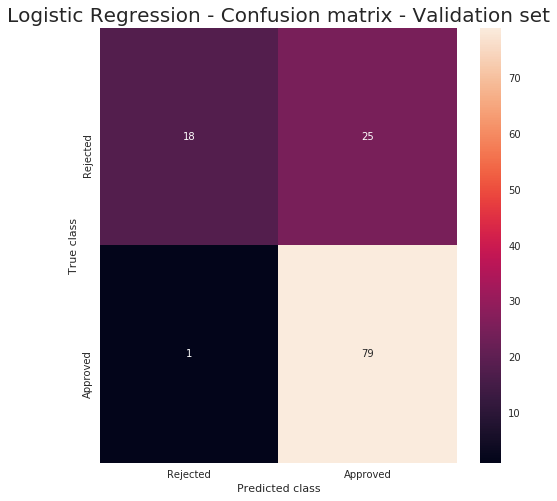

              precision    recall  f1-score   support

    Rejected       0.95      0.42      0.58        43
    Approved       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

No Skill: ROC AUC=0.500
Logistic Regression : ROC AUC=0.738


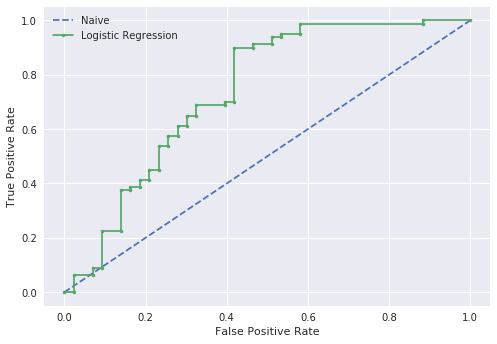

In [18]:
tn, fp, fn, tp = metrics_utils.plot_confusion_matrix(df_result,'Logistic Regression')
metrics_utils.show_performance(df_result)
metrics_utils.plot_ROC(model = lr,model_name = 'Logistic Regression',X_test = X_validation_norm, y_test = y_validation)

### Random Forest

In [19]:
rfc = RandomForestClassifier(
    n_estimators = 100,
    min_samples_split = 3,
    random_state = 0)
rfc.fit(X_train_norm.values,y_train.values.ravel())
df_result = model_utils.predict(rfc,X_validation_norm,y_validation)

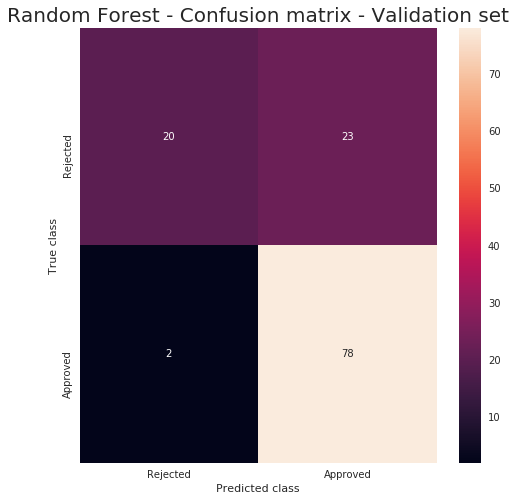

              precision    recall  f1-score   support

    Rejected       0.91      0.47      0.62        43
    Approved       0.77      0.97      0.86        80

    accuracy                           0.80       123
   macro avg       0.84      0.72      0.74       123
weighted avg       0.82      0.80      0.78       123

No Skill: ROC AUC=0.500
Random Forest : ROC AUC=0.697


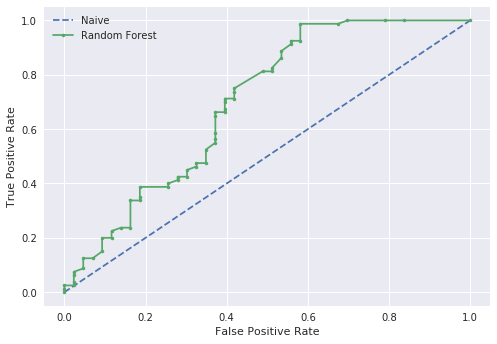

In [20]:
tn, fp, fn, tp = metrics_utils.plot_confusion_matrix(df_result,title = 'Random Forest')
metrics_utils.show_performance(df_result)
metrics_utils.plot_ROC(model = rfc,model_name = 'Random Forest',X_test = X_validation, y_test = y_validation)

### Gradient Boosting

In [22]:
gboost = GradientBoostingClassifier(
            n_estimators = 200,
            min_samples_split = 3,
            random_state = 0)
gboost.fit(X_train_norm.values,y_train.values.ravel())
df_result = model_utils.predict(gboost,X_validation_norm,y_validation)

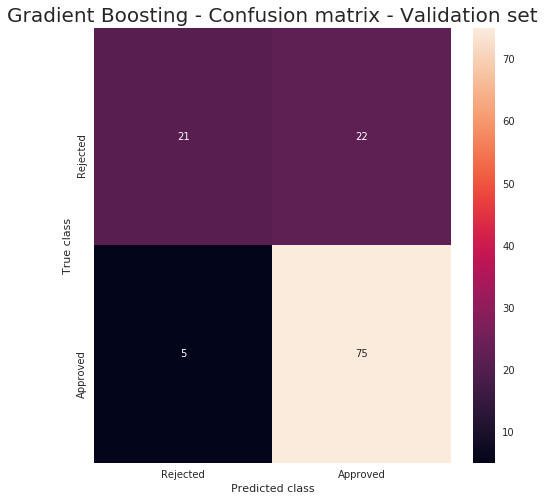

              precision    recall  f1-score   support

    Rejected       0.81      0.49      0.61        43
    Approved       0.77      0.94      0.85        80

    accuracy                           0.78       123
   macro avg       0.79      0.71      0.73       123
weighted avg       0.79      0.78      0.76       123

No Skill: ROC AUC=0.500
Gradient Boosting : ROC AUC=0.753


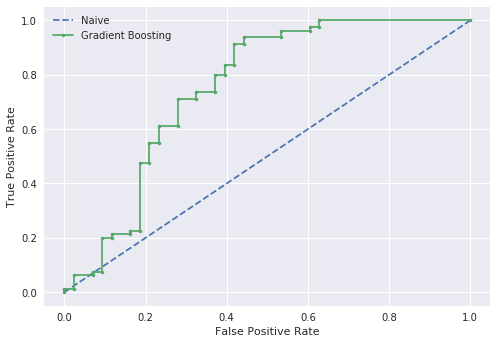

In [23]:
tn, fp, fn, tp = metrics_utils.plot_confusion_matrix(df_result,title = 'Gradient Boosting')
metrics_utils.show_performance(df_result)
metrics_utils.plot_ROC(model = gboost,model_name = 'Gradient Boosting',X_test = X_validation_norm, y_test = y_validation)